In [1]:
import pandas as pd
import numpy as np


In [2]:
data1=pd.read_csv('比赛训练集.csv',encoding='gbk')
data2=pd.read_csv('比赛测试集.csv',encoding='gbk')

#label标记为-1
data2['患有糖尿病标识']=-1
#训练集和测试机合并
data=pd.concat([data1,data2],axis=0,ignore_index=True)
#将舒张压特征中的缺失值填充为-1
data['舒张压']=data['舒张压'].fillna(-1)

In [3]:
data.head()

,编号,性别,出生年份,体重指数,糖尿病家族史,舒张压,口服耐糖量测试,胰岛素释放实验,肱三头肌皮褶厚度,患有糖尿病标识
0,1,0,1996,30.1,无记录,106.0,3.818,7.89,0.0,0
1,2,0,1988,27.5,无记录,84.0,-1.000,0.00,14.7,0
2,3,1,1988,36.5,无记录,85.0,7.131,0.00,40.1,1
3,4,1,1992,29.5,无记录,91.0,7.041,0.00,0.0,0
4,5,0,1998,42.0,叔叔或者姑姑有一方患有糖尿病,-1.0,7.134,0.00,0.0,1


In [4]:
data.loc[:,'患有糖尿病标识'].unique()

array([ 0,  1, -1], dtype=int64)

In [5]:
#特征工程
"""
将出生年份换算成年龄
"""
data['出生年份']=2022-data['出生年份']  #换成年龄
"""
人体的成人体重指数正常值是在18.5-24之间
低于18.5是体重指数过轻
在24-27之间是体重超重
27以上考虑是肥胖
高于32了就是非常的肥胖。
"""
def BMI(a):
   if a<18.5:
       return 0
   elif 18.5<=a<=24:
       return 1
   elif 24<a<=27:
       return 2
   elif 27<a<=32:
       return 3
   else:
       return 4

data['BMI']=data['体重指数'].apply(BMI)
#糖尿病家族史
"""
无记录
叔叔或者姑姑有一方患有糖尿病/叔叔或姑姑有一方患有糖尿病
父母有一方患有糖尿病
"""
def FHOD(a):
   if a=='无记录':
       return 0
   elif a=='叔叔或者姑姑有一方患有糖尿病' or a=='叔叔或姑姑有一方患有糖尿病':
       return 1
   else:
       return 2

data['糖尿病家族史']=data['糖尿病家族史'].apply(FHOD)
"""
舒张压范围为60-90
"""
def DBP(a):
   if a<60:
       return 0
   elif 60<=a<=90:
       return 1
   elif a>90:
       return 2
   else:
       return a
data['DBP']=data['舒张压'].apply(DBP)

In [6]:
data

,编号,性别,出生年份,体重指数,糖尿病家族史,舒张压,口服耐糖量测试,胰岛素释放实验,肱三头肌皮褶厚度,患有糖尿病标识,BMI,DBP
0,1,0,26,30.1,0,106.0,3.818,7.89,0.0,0,3,2
1,2,0,34,27.5,0,84.0,-1.000,0.00,14.7,0,3,1
2,3,1,34,36.5,0,85.0,7.131,0.00,40.1,1,4,1
3,4,1,30,29.5,0,91.0,7.041,0.00,0.0,0,3,2
4,5,0,24,42.0,1,-1.0,7.134,0.00,0.0,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6065,996,1,32,50.1,0,87.0,5.125,0.00,0.0,-1,4,1
6066,997,0,30,56.3,0,87.0,7.695,0.00,0.0,-1,4,1
6067,998,1,30,23.8,0,85.0,3.194,7.50,0.0,-1,1,1
6068,999,0,22,53.1,0,95.0,8.226,7.55,0.0,-1,4,2


划分数据集

In [7]:
#------------------------------------
#将处理好的特征工程分为训练集和测试集，其中训练集是用来训练模型，测试集用来评估模型准确度
#其中编号和患者是否得糖尿病没有任何联系，属于无关特征予以删除
train=data[data['患有糖尿病标识'] !=-1]
test=data[data['患有糖尿病标识'] ==-1]
train_label=train['患有糖尿病标识']
X = train
y = train_label
#X_train = train
#Y_train = y

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3)
X_train = X_train.drop(['编号','患有糖尿病标识'],axis=1)
X_train

X_test = X_test.drop(['编号','患有糖尿病标识'],axis=1)
X_test

#train=train.drop(['编号','患有糖尿病标识'],axis=1)
test=test.drop(['编号','患有糖尿病标识'],axis=1)
test

,性别,出生年份,体重指数,糖尿病家族史,舒张压,口服耐糖量测试,胰岛素释放实验,肱三头肌皮褶厚度,BMI,DBP
5070,0,35,33.1,0,72.0,6.586,24.16,2.94,4,1
5071,0,24,20.6,1,68.0,3.861,0.00,0.00,1,1
5072,1,43,42.1,0,98.0,5.713,0.00,3.53,4,2
5073,0,23,34.6,0,66.0,4.684,0.00,3.14,4,1
5074,0,25,27.7,0,89.0,7.948,14.65,2.65,3,1
...,...,...,...,...,...,...,...,...,...,...
6065,1,32,50.1,0,87.0,5.125,0.00,0.00,4,1
6066,0,30,56.3,0,87.0,7.695,0.00,0.00,4,1
6067,1,30,23.8,0,85.0,3.194,7.50,0.00,1,1
6068,0,22,53.1,0,95.0,8.226,7.55,0.00,4,2


构建模型

In [13]:
# 构建模型
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

model={}
model['rfc']=RandomForestClassifier()
model['gbdt']=GradientBoostingClassifier()
model['cart']=DecisionTreeClassifier()
model['knn']=KNeighborsClassifier()
model['lr']=LogisticRegression()
model['ada'] = AdaBoostClassifier()
model['hgdbt'] = HistGradientBoostingClassifier()
model['bag'] = BaggingClassifier()
model['xgb'] = XGBClassifier()
model['lgb'] = LGBMClassifier()

KFold = KFold(n_splits=10,shuffle=True,random_state=1000)
for i in model:
    model[i].fit(X_train,Y_train)
    score=cross_val_score(model[i],X_train,Y_train,cv=KFold,scoring='f1')
    print('%s的f1为：%.3f'%(i,score.mean()))


rfc的f1为：0.937
gbdt的f1为：0.940
cart的f1为：0.915
knn的f1为：0.842


C:\Users\mjl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mjl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/m

lr的f1为：0.745
ada的f1为：0.917
hgdbt的f1为：0.937
bag的f1为：0.934
xgb的f1为：0.934
lgb的f1为：0.935


In [ ]:
#pre_y=model.predict(test)
#
#result=pd.read_csv('提交示例.csv')
#result['label']=pre_y
#result.to_csv('CART.csv',index=False)

XGB 

params1的分数是: 0.94463
params2的分数是: 0.94384
params3的分数是: 0.94407


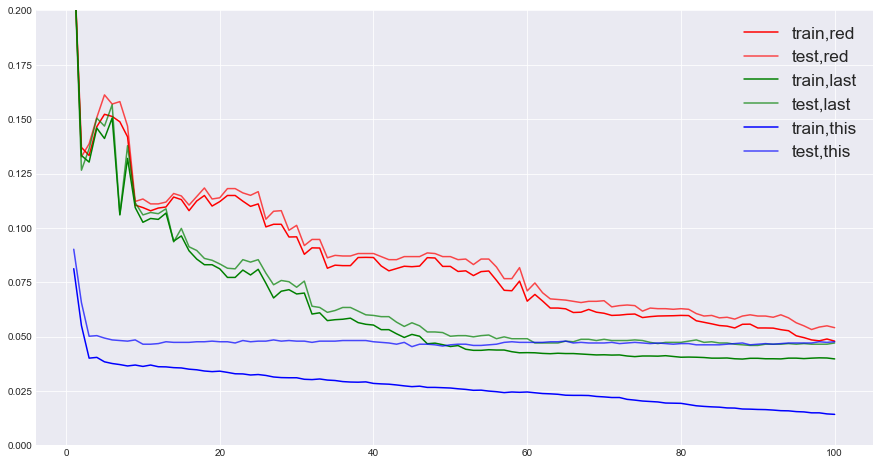

In [41]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
dtrain = xgb.DMatrix(X_train, Y_train)
dtest = xgb.DMatrix(X_test,Y_test)

params1 = {
     #   "silent":True,
        "objective":"binary:logistic",
        "max_depth":2,
        "eta":0.05,
        "gamma":0,
        "lambda":1,
        "alpha":0,
        "colsample_bytree":1,
        "colsample_bylevel":0.4,
        "colsample_bynode":1,
        "eval_metric":"error",
      #  "nfold":5
        }
cv_result1 = xgb.cv(params1,dtrain,num_boost_round=100,nfold=5,seed=1412)
params2 = {
       # "silent":True,
        "objective":"binary:logistic",
        "max_depth":2,
        "eta":0.1,
        "gamma":0.05,
        "lambda":1,
        "alpha":0,
        "colsample_bytree":1,
        "colsample_bylevel":0.4,
        "colsample_bynode":1,
        "eval_metric":"error",
     #  "nfold":5
        }
cv_result2 = xgb.cv(params2,dtrain,num_boost_round=100,nfold=5,seed=1412)

params3 = {
       # "silent":True,
        "objective":"binary:logistic",
        "max_depth":6,
        "eta":0.1,
        "gamma":0.05,
        "lambda":1,
        "alpha":0,
        "colsample_bytree":1,
        "colsample_bylevel":0.4,
        "colsample_bynode":1,
        "eval_metric":"error",
       # "nfold":5
        }
cv_result3 = xgb.cv(params3,dtrain,num_boost_round=100,nfold=5,seed=1412)

params = [params1,params2,params3]
label = ['params1','params2','params3']
for i,label in zip(params,label):
    import xgboost as xgb
    from sklearn.metrics import f1_score
    xgb = xgb.train(i,dtrain,num_boost_round=200)
    Y_predict = pd.DataFrame(xgb.predict(dtest))
    #因为竞赛需要提交最后的预测判断，而模型给出的预测结果是概率，因此我们认为概率>0.5的即该患者有糖尿病，概率<=0.5的没有糖尿病
    Y_predict=Y_predict.loc[:,0].apply(lambda x:1 if x>0.5 else 0)
    print(f'{label}的分数是: {round(f1_score(Y_test,Y_predict),5)}')

plt.style.use('seaborn-dark')
fig,ax = plt.subplots(1,figsize=(15,8))
ax.set_ylim(top=0.2)
ax.grid()
ax.plot(range(1,101),cv_result1.iloc[:,0],c="red",label="train,red")
ax.plot(range(1,101),cv_result1.iloc[:,2],c="red",label="test,red",alpha=0.7)
ax.plot(range(1,101),cv_result2.iloc[:,0],c="green",label="train,last")
ax.plot(range(1,101),cv_result2.iloc[:,2],c="green",label="test,last",alpha=0.7)
ax.plot(range(1,101),cv_result3.iloc[:,0],c="blue",label="train,this")
ax.plot(range(1,101),cv_result3.iloc[:,2],c="blue",label="test,this",alpha=0.7)
ax.legend(fontsize="xx-large")
plt.show()

LGB

In [44]:
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt

dtrain = lgb.Dataset(X_train, Y_train)
dtest = lgb.Dataset(X_test,Y_test)

params4 = {
        'objective':'binary',
        'eta':0.1,
        'max_depth':12,
     #   'num_leaves':5,
        'lambda_l2':0.8,
        'min_data_in_leaf':6,
        'subsample':0.8,
        'bagging_freq':1,
        'feature_fraction':0.8,
        'slient':True,
        'seed': 1000
        }

num_boost_round=100
lgb = lgb.train(params4,dtrain,num_boost_round)

lgb.predict(X_test)
Y_predict = pd.DataFrame(lgb.predict(X_test))
Y_predict
#因为竞赛需要提交最后的预测判断，而模型给出的预测结果是概率，因此我们认为概率>0.5的即该患者有糖尿病，概率<=0.5的没有糖尿病
Y_predict = Y_predict.loc[:,0].apply(lambda x:1 if x>0.5 else 0)

from sklearn.metrics import f1_score
print(f'f1_score: {round(f1_score(Y_test,Y_predict),5)}')

[LightGBM] [Warning] Unknown parameter: slient
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: slient
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1344, number of negative: 2205
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1042
[LightGBM] [Info] Number of data points in the train set: 3549, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.378698 -> initscore=-0.495077
[LightGBM] [Info] Start training from score -0.495077
f1_score: 0.94656


XGB_SK分类

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve
clf = XGBClassifier(
    #silent=0,  #设置成1则没有运行信息输出，最好是设置为0.是否在运行升级时打印消息。
    #nthread=4,# cpu 线程数 默认最大
    learning_rate=0.1,  # 如同学习率
    n_estimators=100,  #树的个数
    min_child_weight=1,
    # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
    #，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
    #这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。
    max_depth=15,  # 构建树的深度，越大越容易过拟合
    gamma=0.5,  # 树的叶子节点上作进一步分区所需的最小损失减少,越大越保守，一般0.1、0.2这样子。
    subsample=1,  # 随机采样训练样本 训练实例的子采样比
    max_delta_step=0,  #最大增量步长，我们允许每个树的权重估计。
    colsample_bytree=1,  # 生成树时进行的列采样 
    reg_lambda=1,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    #reg_alpha=0, # L1 正则项参数
    #scale_pos_weight=1, #如果取值大于0的话，在类别样本不平衡的情况下有助于快速收敛。平衡正负权重
    #objective= 'binary:hinge', #多分类的问题 指定学习任务和相应的学习目标
    #num_class=10, # 类别数，多分类与 multisoftmax 并用
    #seed=1000  #随机种子
    #eval_metric= 'f1'
)
clf = clf.fit(X_train, Y_train)
KFold = KFold(n_splits=10, random_state=None, shuffle=True)
cross_val_score(clf,X_train, Y_train,scoring='f1',cv=KFold).mean()
#cross_validate(clf,X_train, Y_train, cv=KFold)
#learning_curve(clf,X_train, Y_train, cv=KFold)


0.9449593404916026

In [ ]:

from sklearn.metrics import f1_score
y_pre = clf.predict(X_test)
y_pre.shape,Y_test.shape

f1_score(Y_test,y_pre,average='macro')

0.9566290394386823

LGB_SK分类

In [ ]:

clf = LGBMClassifier(
    boosting_type='gbdt',  # 提升树的类型 gbdt,dart,goss,rf
    num_leaves=31,  #树的最大叶子数，对比xgboost一般为2^(max_depth)
    max_depth=10,  #最大树的深度
    learning_rate=0.1,  #学习率
    n_estimators=10,  # 拟合的树的棵树，相当于训练轮数
    subsample_for_bin=200000,
    objective=None,
    class_weight=None,
    min_split_gain=0.0,  # 最小分割增益
    min_child_weight=0.001,  # 分支结点的最小权重
    min_child_samples=20,
    subsample=0.5,  # 训练样本采样率 行
    subsample_freq=0,  # 子样本频率
    colsample_bytree=1.0,  # 训练特征采样率 列
    reg_alpha=0.0,  # L1正则化系数
    reg_lambda=1,  # L2正则化系数
    random_state=None,
    n_jobs=-1,
   # silent=True,
)
clf = clf.fit(X_train, Y_train, eval_metric='auc')
#设置验证集合 verbose=False不打印过程
clf = clf.fit(X_train, Y_train)
#cross_val_score(clf,X_train, Y_train,cv=10).mean()
y_pred = clf.predict(X_test)
from sklearn.metrics import f1_score
f1_score(Y_test, y_pred)

0.9406631762652705

lGBM分类

In [ ]:
#使用Lightgbm方法训练数据集，使用5折交叉验证的方法获得5个测试集预测结果
from sklearn.model_selection import KFold
def select_by_lgb(train_data,train_label,test_data,random_state=2022,n_splits=5,metric='auc',num_round=10000,early_stopping_rounds=100):
   kfold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
   fold=0
   result=[]
   for train_idx, val_idx in kfold.split(train_data):
       random_state+=1
       train_x = train_data.loc[train_idx]
       train_y = train_label.loc[train_idx]
       test_x = train_data.loc[val_idx]
       test_y = train_label.loc[val_idx]
       
       clf=lightgbm
       train_matrix=clf.Dataset(train_x,label=train_y)
       test_matrix=clf.Dataset(test_x,label=test_y)
       params={
               'boosting_type': 'gbdt',
               'objective': 'binary',
               'learning_rate': 0.1,
               'metric': metric,
               'seed': 2020,
               'nthread':-1 }
       model=clf.train(params,train_matrix,num_round,valid_sets=test_matrix,early_stopping_rounds=early_stopping_rounds)
       pre_y=model.predict(test_data)
       result.append(pre_y)
       fold+=1
   return result

In [ ]:
test_data=select_by_lgb(train,train_label,test)
#test_data就是5折交叉验证中5次预测的结果
pre_y=pd.DataFrame(test_data).T
#将5次预测的结果求取平均值，当然也可以使用其他的方法
pre_y['averge']=pre_y[[i for i in range(5)]].mean(axis=1)
#因为模型给出的预测结果是概率，因此我们认为概率>0.5的即该患者有糖尿病，概率<=0.5的没有糖尿病
pre_y['label']=pre_y['averge'].apply(lambda x:1 if x>0.5 else 0)
pre_y

C:\Users\mjl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 1547, number of negative: 2509
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1053
[LightGBM] [Info] Number of data points in the train set: 4056, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381410 -> initscore=-0.483567
[LightGBM] [Info] Start training from score -0.483567
[1]	valid_0's auc: 0.986377
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.989898
[3]	valid_0's auc: 0.989063
[4]	valid_0's auc: 0.990182
[5]	valid_0's auc: 0.990087
[6]	valid_0's auc: 0.990219
[7]	valid_0's auc: 0.990172
[8]	valid_0's auc: 0.990085
[9]	valid_0's auc: 0.990299
[10]	valid_0's auc: 0.989217
[11]	valid_0's auc: 0.989366
[12]	valid_0's auc: 0.98951
[13]	valid_0's auc: 0.989497
[14]	valid_0'

C:\Users\mjl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 1550, number of negative: 2506
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1049
[LightGBM] [Info] Number of data points in the train set: 4056, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382150 -> initscore=-0.480433
[LightGBM] [Info] Start training from score -0.480433
[1]	valid_0's auc: 0.983095
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.985003
[3]	valid_0's auc: 0.984503
[4]	valid_0's auc: 0.986663
[5]	valid_0's auc: 0.986739
[6]	valid_0's auc: 0.986816
[7]	valid_0's auc: 0.986927
[8]	valid_0's auc: 0.986799
[9]	valid_0's auc: 0.986807
[10]	valid_0's auc: 0.986904
[11]	valid_0's auc: 0.987053
[12]	valid_0's auc: 0.987243
[13]	valid_0's auc: 0.987115
[14]	valid_0

C:\Users\mjl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[76]	valid_0's auc: 0.990291
[77]	valid_0's auc: 0.990307
[78]	valid_0's auc: 0.99034
[79]	valid_0's auc: 0.990402
[80]	valid_0's auc: 0.99048
[81]	valid_0's auc: 0.990484
[82]	valid_0's auc: 0.990451
[83]	valid_0's auc: 0.990332
[84]	valid_0's auc: 0.990402
[85]	valid_0's auc: 0.990352
[86]	valid_0's auc: 0.990336
[87]	valid_0's auc: 0.990381
[88]	valid_0's auc: 0.990352
[89]	valid_0's auc: 0.990348
[90]	valid_0's auc: 0.99022
[91]	valid_0's auc: 0.990241
[92]	valid_0's auc: 0.990253
[93]	valid_0's auc: 0.990262
[94]	valid_0's auc: 0.990307
[95]	valid_0's auc: 0.990303
[96]	valid_0's auc: 0.990278
[97]	valid_0's auc: 0.990262
[98]	valid_0's auc: 0.990328
[99]	valid_0's auc: 0.990402
[100]	valid_0's auc: 0.990361
[101]	valid_0's auc: 0.990398
[102]	valid_0's auc: 0.990332
[103]	valid_0's auc: 0.990278
[104]	valid_0's auc: 0.990225
[105]	valid_0's auc: 0.99022
[106]	valid_0's auc: 0.990262
[107]	valid_0's auc: 0.990253
[108]	valid_0's auc: 0.990319
[109]	valid_0's auc: 0.990406
[110]	va

C:\Users\mjl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 1547, number of negative: 2509
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1047
[LightGBM] [Info] Number of data points in the train set: 4056, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381410 -> initscore=-0.483567
[LightGBM] [Info] Start training from score -0.483567
[1]	valid_0's auc: 0.98691
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.987029
[3]	valid_0's auc: 0.988849
[4]	valid_0's auc: 0.988691
[5]	valid_0's auc: 0.988374
[6]	valid_0's auc: 0.988086
[7]	valid_0's auc: 0.988274
[8]	valid_0's auc: 0.98794
[9]	valid_0's auc: 0.987926
[10]	valid_0's auc: 0.987862
[11]	valid_0's auc: 0.987953
[12]	valid_0's auc: 0.988204
[13]	valid_0's auc: 0.988218
[14]	valid_0's

C:\Users\mjl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 1551, number of negative: 2505
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1045
[LightGBM] [Info] Number of data points in the train set: 4056, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382396 -> initscore=-0.479389
[LightGBM] [Info] Start training from score -0.479389
[1]	valid_0's auc: 0.98902
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.988935
[3]	valid_0's auc: 0.989466
[4]	valid_0's auc: 0.993213
[5]	valid_0's auc: 0.99325
[6]	valid_0's auc: 0.993341
[7]	valid_0's auc: 0.993416
[8]	valid_0's auc: 0.99342
[9]	valid_0's auc: 0.994085
[10]	valid_0's auc: 0.993963
[11]	valid_0's auc: 0.994149
[12]	valid_0's auc: 0.994188
[13]	valid_0's auc: 0.99452
[14]	valid_0's a

,0,1,2,3,4,averge,label
0,0.193088,0.261366,0.144240,0.405719,0.307045,0.262292,0
1,0.020794,0.001088,0.014207,0.044715,0.074112,0.030983,0
2,0.024721,0.005525,0.021410,0.070816,0.147284,0.053951,0
3,0.060593,0.018353,0.058337,0.099952,0.088516,0.065150,0
4,0.244923,0.066848,0.148535,0.221646,0.204710,0.177332,0
...,...,...,...,...,...,...,...
995,0.010247,0.000792,0.013880,0.025754,0.060279,0.022190,0
996,0.986770,0.999686,0.982167,0.964190,0.911726,0.968908,1
997,0.010001,0.000445,0.013815,0.025754,0.060279,0.022059,0
998,0.986770,0.999750,0.982167,0.964190,0.911726,0.968921,1


### 结果提交


In [ ]:
result=pd.read_csv('提交示例.csv')
result['label']=pre_y['label']
result.to_csv('result.csv',index=False)